In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro as shp
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import pandas as pd
import numpy as np

D:\conda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\conda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\conda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

The variable informations of the dataset is given below
-> 8 variables: 

-> MPG (miles per gallon), 
-> cylinders, 
-> engine displacement (cu. inches), 
-> horsepower,
-> vehicle weight (lbs.), 
-> time to accelerate from O to 60 mph (sec.),
-> model year (modulo 100), and 
-> origin of car (1. American, 2. European,3. Japanese).

We need to explain the relationship a car's mileage (mpg) has with its other attributes with the help of linear model


In [3]:
# reading the dataset
data=pd.read_csv('Datasets/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
#dropping car name as it makes no significance for this sinario
data=data.drop('car name',axis=1 )
# replacing origin column with  1 : Amerrica 2: Europe 3: Japaniese as they are described in the data file
data['origin']=data['origin'].replace({1: 'American',2: 'Europian', 3:'Japanese'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,American
1,15.0,8,350.0,165,3693,11.5,70,American
2,18.0,8,318.0,150,3436,11.0,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,17.0,8,302.0,140,3449,10.5,70,American


In [6]:
# checking the datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
# despite of having numbers horsepower is having an object datatype. This means there might be some non-digit values present
hpIsDigit=pd.DataFrame(data.horsepower.str.isdigit()) # if the string is made of digits store True else False
data[hpIsDigit['horsepower']==False] # printing data where there is non-digit horse power

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,American
126,21.0,6,200.0,?,2875,17.0,74,American
330,40.9,4,85.0,?,1835,17.3,80,Europian
336,23.6,4,140.0,?,2905,14.3,80,American
354,34.5,4,100.0,?,2320,15.8,81,Europian
374,23.0,4,151.0,?,3035,20.5,82,American


In [8]:
data=data.replace('?',np.nan)
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,American
126,21.0,6,200.0,NaN,2875,17.0,74,American
330,40.9,4,85.0,NaN,1835,17.3,80,Europian
336,23.6,4,140.0,NaN,2905,14.3,80,American
354,34.5,4,100.0,NaN,2320,15.8,81,Europian
374,23.0,4,151.0,NaN,3035,20.5,82,American


In [9]:
# replacing the missing values of horsepower column with its meadian
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [10]:
data['horsepower']=data['horsepower'].astype('float32')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float32
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float32(1), float64(3), int64(3), object(1)
memory usage: 23.4+ KB


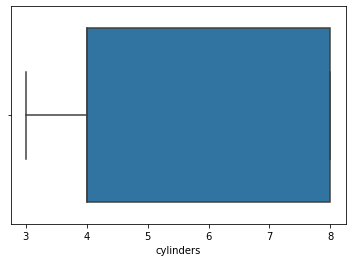

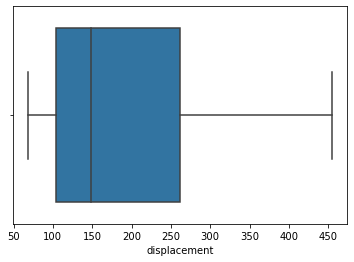

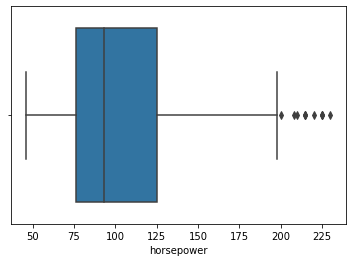

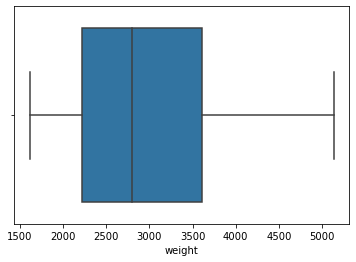

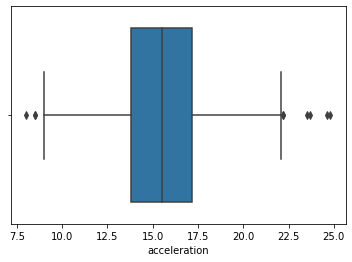

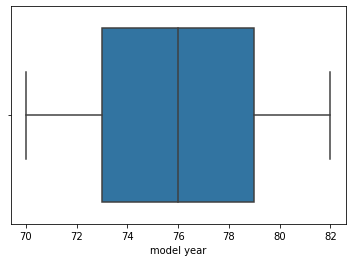

In [12]:
# checking for outliers in data. we csan visualise it in boxplot
for i in (data.drop(['origin','mpg'],axis=1)):
    fig=plt.figure()
    sns.boxplot(data[i])



In [13]:
#Identifying the outliers
def outliers_cc(df):
    for i in df:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-1.5*IQR
        upperbound=Q3+1.5*IQR
        cnt=0
        for k in df[i].values:
            if (k<lowerbound or k>upperbound):
                cnt+=1
        print(i,'=','Q1: ',Q1,'Q3: ',Q3,'IQR: ',IQR,'lowerbound: ',lowerbound,'upperbound: ',upperbound,'outlier count: ',cnt)


In [14]:
outliers_cc(data.drop(['mpg','origin'],axis=1))

cylinders = Q1:  4.0 Q3:  8.0 IQR:  4.0 lowerbound:  -2.0 upperbound:  14.0 outlier count:  0
displacement = Q1:  104.25 Q3:  262.0 IQR:  157.75 lowerbound:  -132.375 upperbound:  498.625 outlier count:  0
horsepower = Q1:  76.0 Q3:  125.0 IQR:  49.0 lowerbound:  2.5 upperbound:  198.5 outlier count:  11
weight = Q1:  2223.75 Q3:  3608.0 IQR:  1384.25 lowerbound:  147.375 upperbound:  5684.375 outlier count:  0
acceleration = Q1:  13.825000000000001 Q3:  17.174999999999997 IQR:  3.349999999999996 lowerbound:  8.800000000000008 upperbound:  22.199999999999992 outlier count:  9
model year = Q1:  73.0 Q3:  79.0 IQR:  6.0 lowerbound:  64.0 upperbound:  88.0 outlier count:  0


In [15]:
# As we can there are outliers in horsepower and acceleration. Removing the outliers from horsepower
Q1=data['horsepower'].quantile(0.25)
Q3=data['horsepower'].quantile(0.75)
IQR=Q3-Q1
lowerb=Q1-1.5*IQR
highb=Q3+1.5*IQR
data=data[(data['horsepower']>lowerb)&(data['horsepower']<highb)]
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,American
1,15.0,8,350.0,165.0,3693,11.5,70,American
2,18.0,8,318.0,150.0,3436,11.0,70,American
3,16.0,8,304.0,150.0,3433,12.0,70,American
4,17.0,8,302.0,140.0,3449,10.5,70,American


In [16]:
# Similarly removing outliers from acceleration
Q1=data['acceleration'].quantile(0.25)
Q3=data['acceleration'].quantile(0.75)
IQR=Q3-Q1
lowerb=Q1-1.5*IQR
highb=Q3+1.5*IQR
data=data[(data['acceleration']>lowerb)&(data['acceleration']<highb)]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,American
1,15.0,8,350.0,165.0,3693,11.5,70,American
2,18.0,8,318.0,150.0,3436,11.0,70,American
3,16.0,8,304.0,150.0,3433,12.0,70,American
4,17.0,8,302.0,140.0,3449,10.5,70,American


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           381 non-null    float64
 1   cylinders     381 non-null    int64  
 2   displacement  381 non-null    float64
 3   horsepower    381 non-null    float32
 4   weight        381 non-null    int64  
 5   acceleration  381 non-null    float64
 6   model year    381 non-null    int64  
 7   origin        381 non-null    object 
dtypes: float32(1), float64(3), int64(3), object(1)
memory usage: 25.3+ KB


## Checking the linearity among independent and dependent variabels

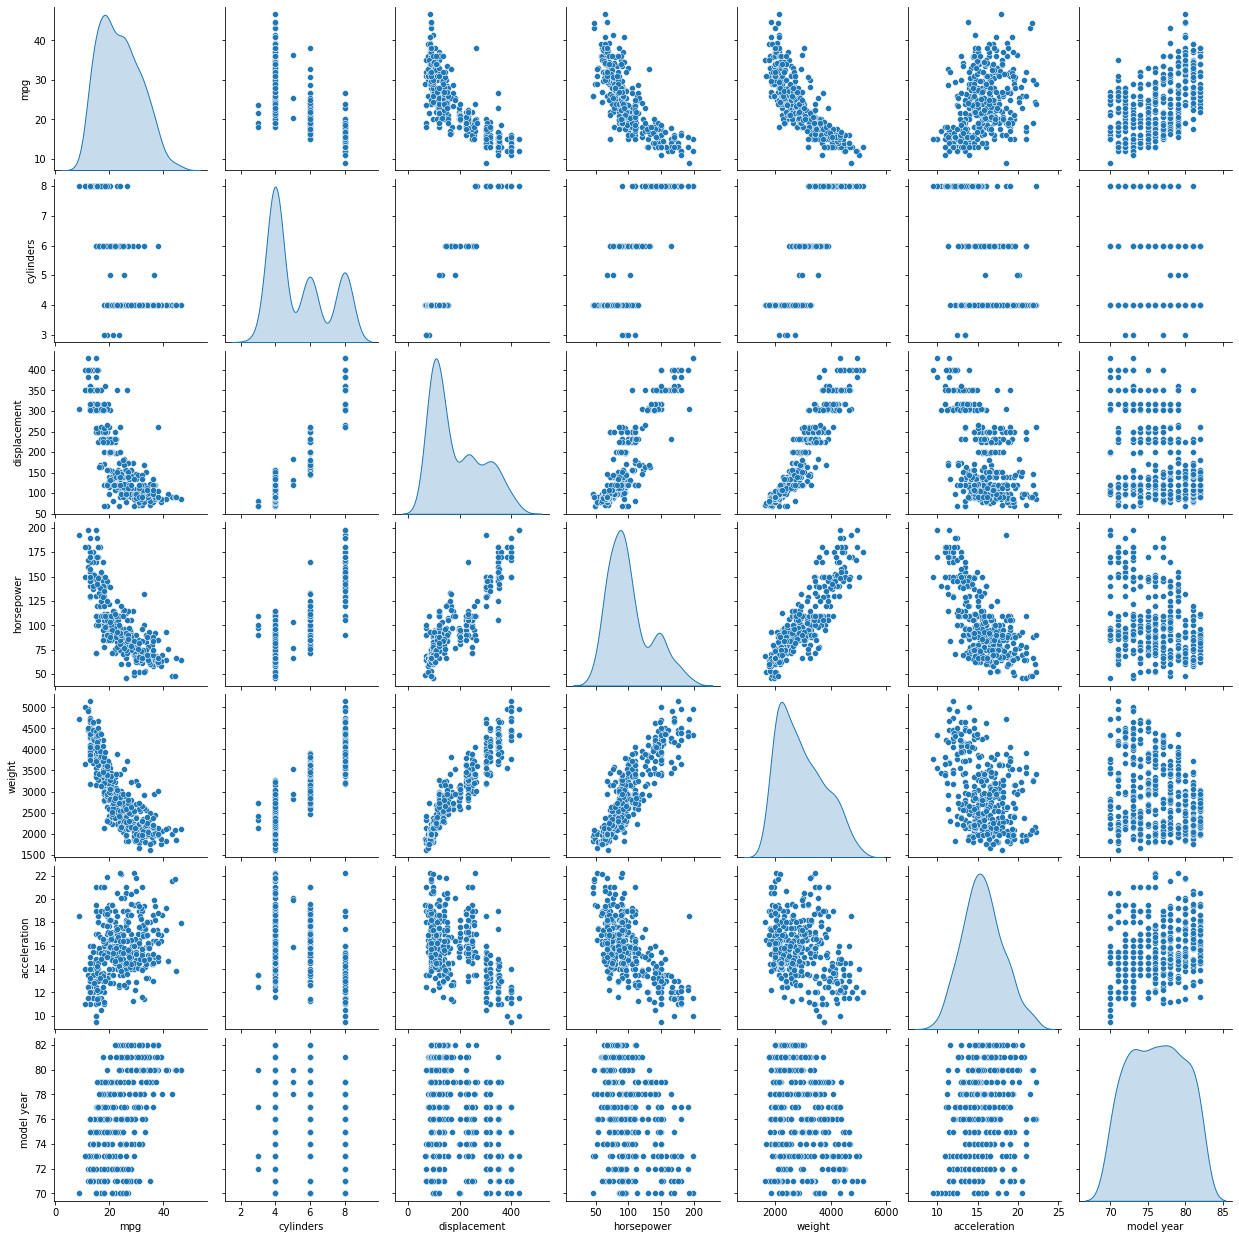

In [18]:
sns.pairplot(data.iloc[:,0:7],diag_kind='kde')

Above we can see there is an inverse correlation between dependent and the independent variables. We can calculate the strength of the correlation using pearso correlation 

In [19]:
for i in (data.drop(['origin','mpg'],axis=1)):
    pearson_corr,p_val=sts.pearsonr(data['mpg'],data[i])
    print('correlation between {} and mpg: {} and its p-value: {}'.format(i,pearson_corr,p_val))

correlation between cylinders and mpg: -0.7643468779872833 and its p-value: 3.1744605216769324e-74
correlation between displacement and mpg: -0.8022203399971711 and its p-value: 6.447983578461894e-87
correlation between horsepower and mpg: -0.7813338557539761 and its p-value: 1.3292747455713377e-79
correlation between weight and mpg: -0.8291623623078144 and its p-value: 9.216469342988345e-98
correlation between acceleration and mpg: 0.3603955393293724 and its p-value: 3.9628520519255327e-13
correlation between model year and mpg: 0.5464512433686092 and its p-value: 4.8040253489462025e-31


From the above correlaiton coefficients and its respective p-values we can conclude that there is almost 0 probability of having no relationbetween dependent and independent features

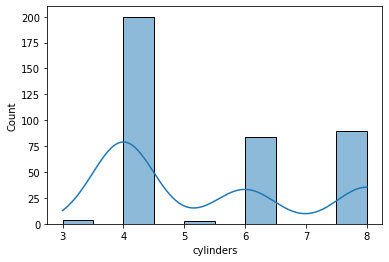

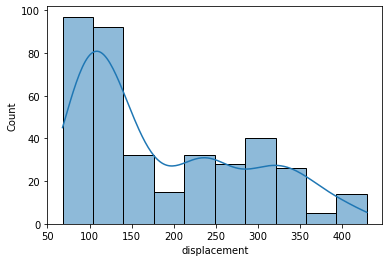

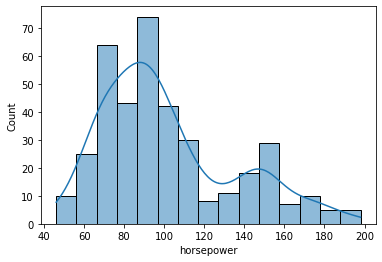

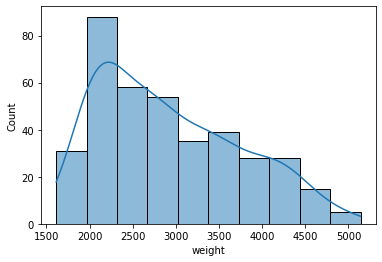

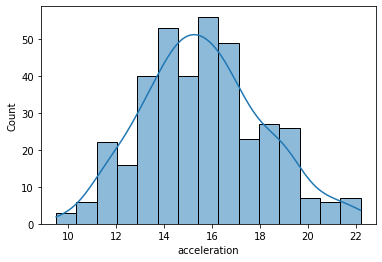

In [20]:
# From histograms we can check how the data is distributed
for i in data.drop(['mpg','model year','origin'],axis=1):
    fig=plt.figure()
    sns.histplot(x=data[i],kde=True)

cylinders
ShapiroResult(statistic=0.74753737449646, pvalue=1.0739688047754553e-23)
displacement
ShapiroResult(statistic=0.8778624534606934, pvalue=8.460516463500164e-17)
horsepower
ShapiroResult(statistic=0.9211702346801758, pvalue=2.953878190225384e-13)
weight
ShapiroResult(statistic=0.942747950553894, pvalue=5.845210426791425e-11)
acceleration
ShapiroResult(statistic=0.991171658039093, pvalue=0.02248353138566017)


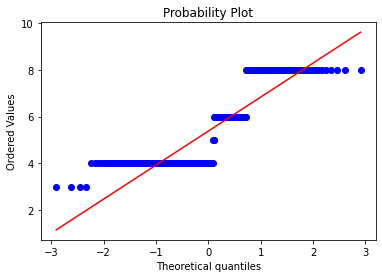

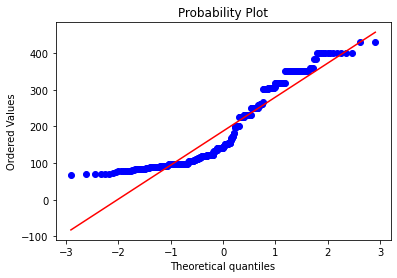

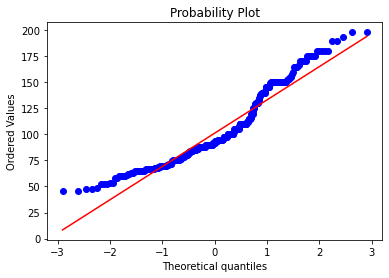

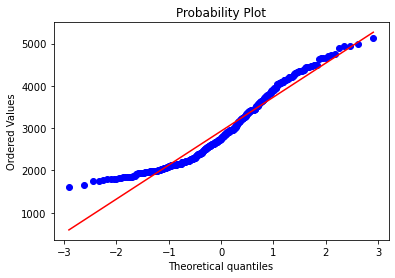

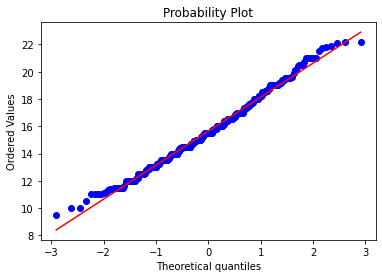

In [21]:
# From the above histograms we can see the features not following the Guassian distribution. However we also confirm from statistical methods
for i in data.drop(['mpg','model year','origin'],axis=1):
          print(i)
          fig=plt.figure()
          sts.probplot(data[i],dist='norm',plot=plt)
          print(shp(data[i]))

In [22]:
#Values like 'america' cannot be read into an equation.
#Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! 
#we dont want to impose such an baseless assumption! Hence creating dummy variables
data=pd.get_dummies(data,columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_Europian,origin_Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [23]:
#splitting the data into independent and dependent variables
X=data.drop(['mpg','origin_Europian'],axis=1)
y=data[['mpg']]


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(304, 8)
(77, 8)
(304, 1)
(77, 1)


Since the range of values in the features is varing widely, It is very much important to bring all features into same scale 
for the better performance of the model

In [26]:
# Using the min-max scalar(As features are not normally distributed Min-max scalar responds well)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [27]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_Japanese
364,8,350.0,105.0,3725,19.0,81,1,0
298,8,350.0,125.0,3900,17.4,79,1,0
108,4,97.0,88.0,2279,19.0,73,0,1
366,6,225.0,85.0,3465,16.6,81,1,0
359,4,141.0,80.0,3230,20.4,81,0,0


In [28]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [29]:
X_train_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_Japanese
0,1.0,0.781163,0.380000,0.598809,0.748031,0.916667,1.0,0.0
1,1.0,0.781163,0.513333,0.648426,0.622047,0.750000,1.0,0.0
2,0.2,0.080332,0.266667,0.188829,0.748031,0.250000,0.0,1.0
3,0.6,0.434903,0.246667,0.525092,0.559055,0.916667,1.0,0.0
4,0.2,0.202216,0.213333,0.458463,0.858268,0.916667,0.0,0.0


In [30]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [31]:
X_test_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_Japanese
0,0.6,0.451524,0.380000,0.500992,0.496063,0.666667,1.0,0.0
1,0.6,0.454294,0.280000,0.417352,0.637795,0.500000,1.0,0.0
2,1.0,0.551247,0.513333,0.564786,0.433071,0.750000,1.0,0.0
3,0.6,0.434903,0.346667,0.577828,0.645669,0.500000,1.0,0.0
4,0.2,0.047091,0.146667,0.129572,0.716535,0.666667,0.0,1.0


##  Building model

In [32]:
linear_regression=LinearRegression()
linear_regression.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
for num,column in enumerate(X_train_scaled.columns):
    print('the coefficient of {} is {}'.format(column,linear_regression.coef_[0][num]))
print('the intercept is {}'.format(linear_regression.intercept_[0]))

the coefficient of cylinders is -1.4822005145688328
the coefficient of displacement is 6.069489446966708
the coefficient of horsepower is -8.103115018149852
the coefficient of weight is -18.86816008156991
the coefficient of acceleration is -2.3079931750273084
the coefficient of model year is 8.95802950214488
the coefficient of origin_American is -2.06318121080684
the coefficient of origin_Japanese is 0.7605929337179324
the intercept is 29.939359384618008


In [34]:
linear_regression.score(X_train_scaled,y_train)

0.8215752434831279

In [35]:
linear_regression.score(X_test_scaled,y_test)

0.8081159163614968

## We can visualise how the model trained and fitted on data

In [36]:
y_train['predicted mpg']=linear_regression.predict(X_train_scaled)
y_test['predicted mpg']=linear_regression.predict(X_test_scaled)

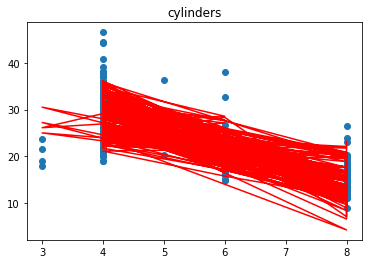

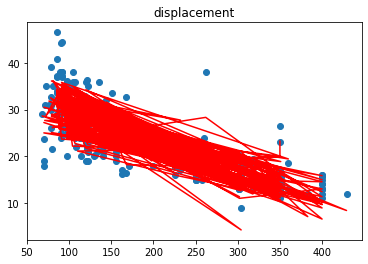

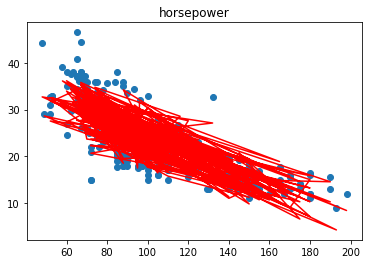

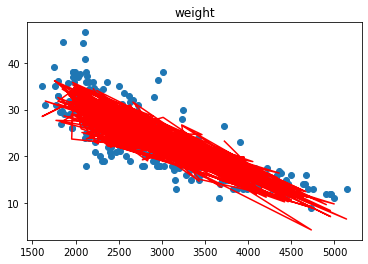

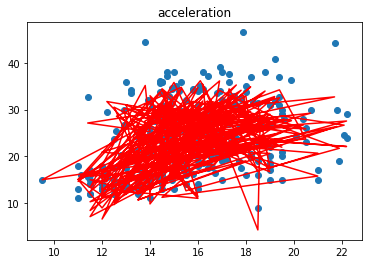

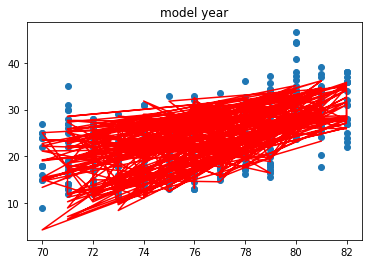

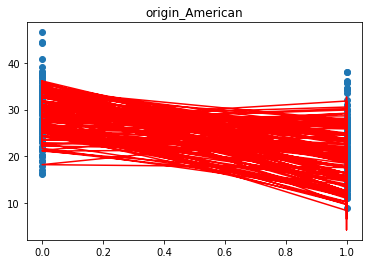

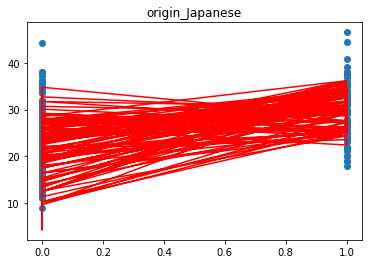

In [37]:
for i in X_train:
    fig=plt.figure()
    plt.title(i)
    plt.scatter(X_train[i],y_train['mpg'])
    plt.plot(X_train[i],y_train['predicted mpg'],color='r')

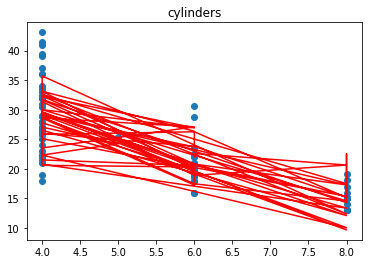

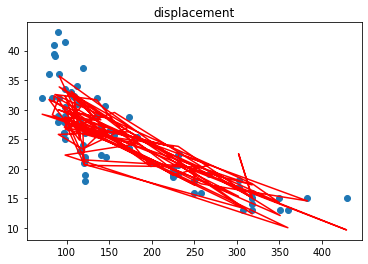

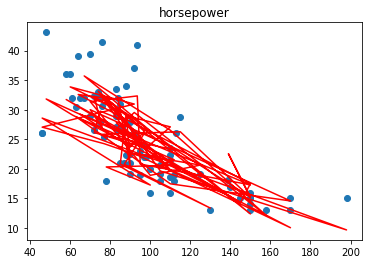

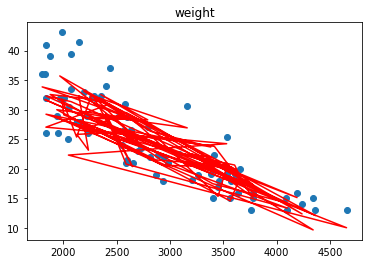

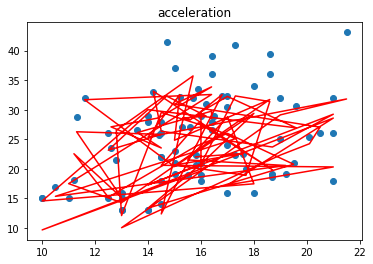

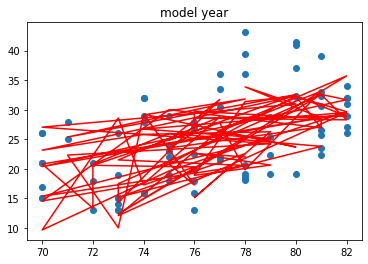

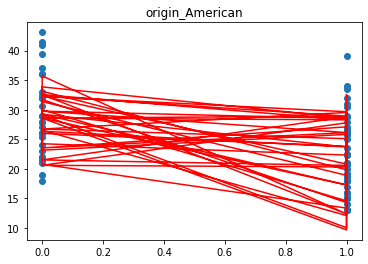

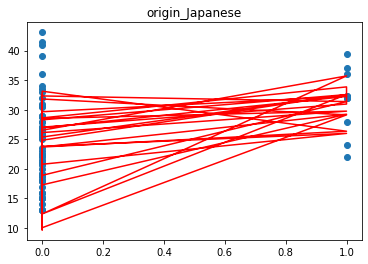

In [38]:
for i in X_test:
    fig=plt.figure()
    plt.title(i)
    plt.scatter(X_test[i],y_test['mpg'])
    plt.plot(X_test[i],y_test['predicted mpg'],color='r')